# **Proyecto Final Data Science- CoderHouse**

* Dataset selected for analysis: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

### Proyecto enfocado en ML para Retail

### - - Conjunto de datos públicos de comercio electrónico brasileño por Olist
* Objetivo: Un algoritmo de ML ideal predecirá el posible interes de compra de clientes.
* Nombre del archivo: Olist.zip (Varios archivos)
* Variable Target: Cliente_único_id

In [1]:
# Import necessary libraries
#---------------------------------------------------------------------------------------------------------------------------

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # for operations on dataframes
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns #data visualisation
import plotly.express as px #data visualisation
import pandas_profiling as pp # exploratory data analysis EDA
import datetime # for manupulating time and date columns
from scipy import stats # for optimization, linear algebra, integration, interpolation
#from sklearn.cluster import KMeans #for clustering and evaluation
#from sklearn.preprocessing import StandardScaler # For handling categorical column and scaling numeric columns
import warnings
warnings.filterwarnings("ignore")# for warning control


In [2]:
# Read the files
#---------------------------------------------------------------------------------------------------------------------------

customers_df = pd.read_csv("olist_customers_dataset.csv")
orderitem_df = pd.read_csv("olist_order_items_dataset.csv")
orderpay_df = pd.read_csv("olist_order_payments_dataset.csv")
orderreviews_df = pd.read_csv("olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("olist_orders_dataset.csv")
products_df = pd.read_csv("olist_products_dataset.csv")
sellers_df = pd.read_csv("olist_sellers_dataset.csv")
categname_df = pd.read_csv("product_category_name_translation.csv")

In [3]:
# Change cols names before merging 
#---------------------------------------------------------------------------------------------------------------------------

customers_df.rename(columns={"customer_zip_code_prefix": "zip_code"}, inplace=True)

In [4]:
# Join datasets using the Merge function
#---------------------------------------------------------------------------------------------------------------------------

data = orders_df.merge(customers_df, on="customer_id").merge(orderitem_df, 
             on="order_id").merge(products_df, on="product_id").merge(categname_df, 
                    on="product_category_name").merge(orderpay_df, on="order_id").merge(sellers_df, 
                            on="seller_id").merge(orderreviews_df, on="order_id")

In [5]:
# Explore the first 5 records of the dataset
#---------------------------------------------------------------------------------------------------------------------------

data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code,...,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.12,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.00,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.59,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,37.77,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,37.77,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23


In [6]:
#Information of data
#---------------------------------------------------------------------------------------------------------------------------

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   customer_unique_id             115609 non-null  object 
 9   zip_code                       115609 non-null  int64  
 10  customer_city                  115609 non-null  object 
 11  customer_state                 115609 non-null  object 
 12  order_item_id                 

In [7]:
data.describe()

,zip_code,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,review_score
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,1.093747,2.946233,172.387379,24515.713958,4.034409
std,29841.671732,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,0.729849,2.781087,265.873969,27636.640968,1.385584
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000,1.000000
25%,11310.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000,6429.000000,4.000000
50%,24241.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.050000,13660.000000,5.000000
75%,58745.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.480000,28605.000000,5.000000
max,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000,5.000000


In [8]:
#Checking Null values 
#---------------------------------------------------------------------------------------------------------------------------

data.isna().sum().sort_values(ascending=False)

review_comment_title             101808
review_comment_message            66703
order_delivered_customer_date      2400
order_delivered_carrier_date       1195
order_approved_at                    14
product_length_cm                     1
product_height_cm                     1
product_width_cm                      1
product_weight_g                      1
payment_installments                  0
product_category_name_english         0
payment_sequential                    0
payment_type                          0
order_id                              0
payment_value                         0
seller_zip_code_prefix                0
seller_city                           0
review_id                             0
review_score                          0
review_creation_date                  0
seller_state                          0
product_description_lenght            0
product_photos_qty                    0
customer_id                           0
order_status                          0


In [9]:
#Percentage representation of null values
#---------------------------------------------------------------------------------------------------------------------------

(data.isna().sum() / len(data) ).sort_values(ascending=False)*100

review_comment_title             88.062348
review_comment_message           57.697065
order_delivered_customer_date     2.075963
order_delivered_carrier_date      1.033657
order_approved_at                 0.012110
product_length_cm                 0.000865
product_height_cm                 0.000865
product_width_cm                  0.000865
product_weight_g                  0.000865
payment_installments              0.000000
product_category_name_english     0.000000
payment_sequential                0.000000
payment_type                      0.000000
order_id                          0.000000
payment_value                     0.000000
seller_zip_code_prefix            0.000000
seller_city                       0.000000
review_id                         0.000000
review_score                      0.000000
review_creation_date              0.000000
seller_state                      0.000000
product_description_lenght        0.000000
product_photos_qty                0.000000
customer_id

In [10]:
#Counting number of Null values
#---------------------------------------------------------------------------------------------------------------------------

data.isnull().sum().sort_values(ascending=False)

review_comment_title             101808
review_comment_message            66703
order_delivered_customer_date      2400
order_delivered_carrier_date       1195
order_approved_at                    14
product_length_cm                     1
product_height_cm                     1
product_width_cm                      1
product_weight_g                      1
payment_installments                  0
product_category_name_english         0
payment_sequential                    0
payment_type                          0
order_id                              0
payment_value                         0
seller_zip_code_prefix                0
seller_city                           0
review_id                             0
review_score                          0
review_creation_date                  0
seller_state                          0
product_description_lenght            0
product_photos_qty                    0
customer_id                           0
order_status                          0


In [11]:
#Dropping unnecessary columns with large number of Null values
#---------------------------------------------------------------------------------------------------------------------------

data_no_review = data.drop(['review_comment_title', 'review_comment_message'], axis=1)

data_no_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   customer_unique_id             115609 non-null  object 
 9   zip_code                       115609 non-null  int64  
 10  customer_city                  115609 non-null  object 
 11  customer_state                 115609 non-null  object 
 12  order_item_id                 

In [12]:
#Dropping all Null values from Dataset
#---------------------------------------------------------------------------------------------------------------------------

data_clean = data_no_review.dropna()

In [13]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 115608
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113193 non-null  object 
 1   customer_id                    113193 non-null  object 
 2   order_status                   113193 non-null  object 
 3   order_purchase_timestamp       113193 non-null  object 
 4   order_approved_at              113193 non-null  object 
 5   order_delivered_carrier_date   113193 non-null  object 
 6   order_delivered_customer_date  113193 non-null  object 
 7   order_estimated_delivery_date  113193 non-null  object 
 8   customer_unique_id             113193 non-null  object 
 9   zip_code                       113193 non-null  int64  
 10  customer_city                  113193 non-null  object 
 11  customer_state                 113193 non-null  object 
 12  order_item_id                 

### - - Analisis estado inicial dataset compilado 

* Valores nulos: Se encuentran en:
    *review_comment_title              : Titulo del comentario del cliente.
    *review_comment_message            : Comentarios sobre alfuna novedad encontrada por el cliente.
    *order_delivered_customer_date     : Fecha de orden entregada al cliente.
    *order_delivered_carrier_date      : Fecha d orden entregada al transportista.
    
Para efectos de analisis numerico las dos primeras columnas no tienen incidencia importante, sin embargo, las fechas inexistentes de orden entregada al cleinte y orden entregada a transportista pueden causar un problema si se quiere analizar elindicador OTIF (On Time In Full) , indicador primiordial para la industria E- commerce.

# - - Analisis Univariado

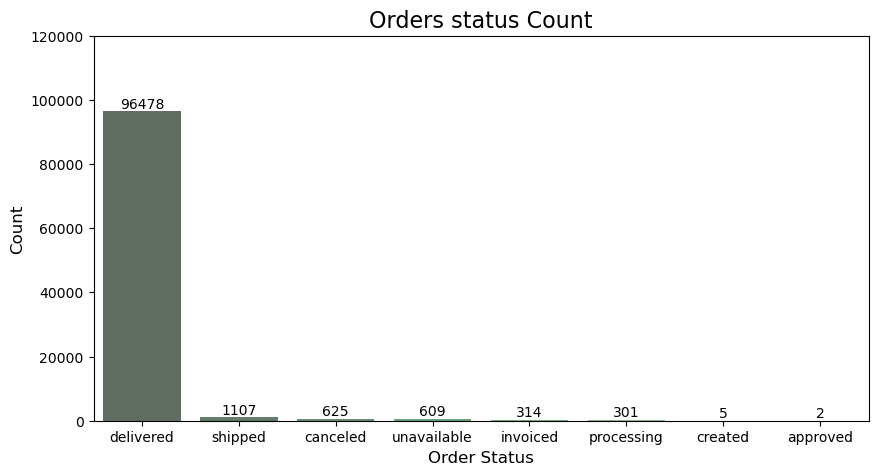

In [14]:
# Analysing the volume of each order status.

orderc = orders_df['order_status'].value_counts(ascending=False)

plt.figure(figsize=(10,5))

palette = sns.color_palette('Greens_d', len(orderc))
ax = sns.barplot(orderc.index, orderc.values, alpha=0.8 , palette=np.array(palette[::-1]))

plt.title('Orders status Count', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Order Status', fontsize=12)
plt.ylim(0,120000) 
ax.bar_label(ax.containers[0])

plt.show()

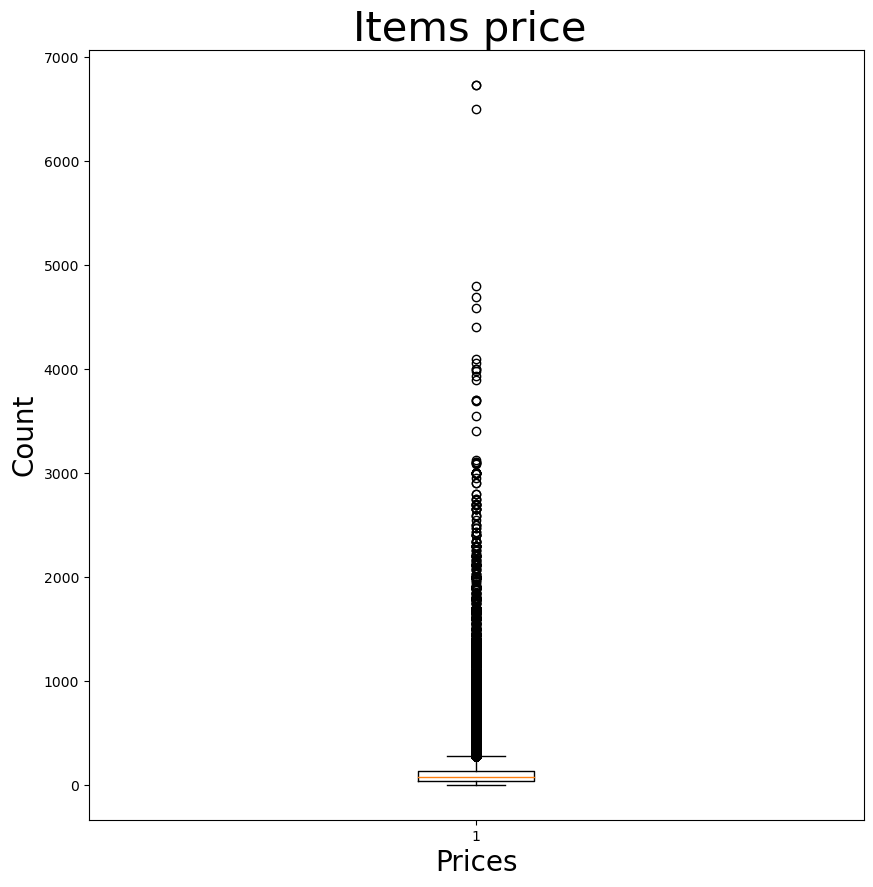

In [15]:
# Understanding quantity of different prices.

plt.figure(figsize=(10,10))

plt.boxplot(orderitem_df['price'])

plt.title("Items price ", fontsize=30)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Prices', fontsize=20)

plt.show()

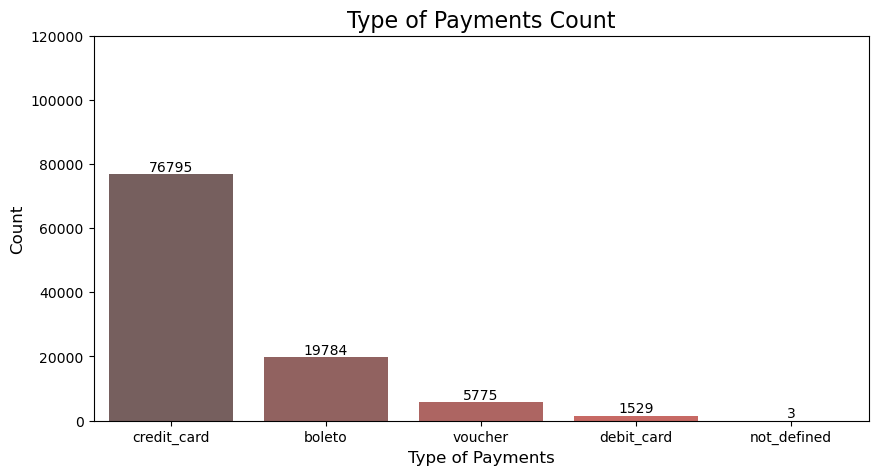

In [16]:
# counting type of payments.

payment_t = orderpay_df['payment_type'].value_counts(ascending=False)

plt.figure(figsize=(10,5))

palette = sns.color_palette('Reds_d', len(orderc))
ax = sns.barplot(payment_t.index, payment_t.values, alpha=0.8 , palette=np.array(palette[::-1]))

plt.title('Type of Payments Count', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Type of Payments', fontsize=12)
plt.ylim(0,120000) 
ax.bar_label(ax.containers[0])

plt.show()

# - - Analisis Bivariado

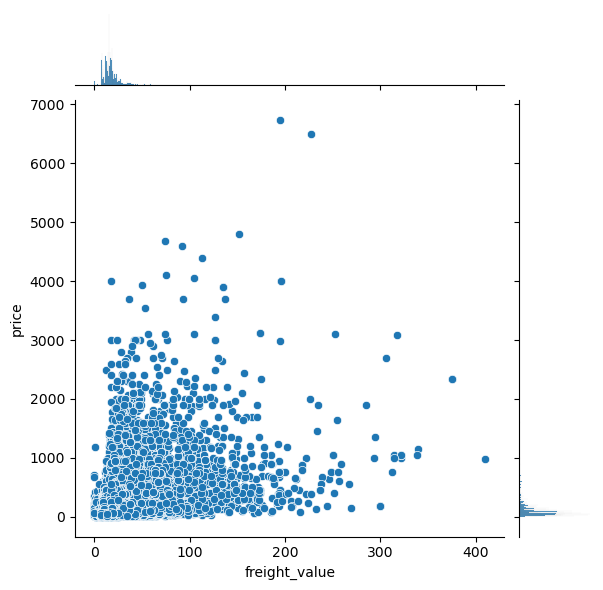

In [17]:
# Relation between Freight Value and Product value

sns.jointplot(data= data_clean, x= 'freight_value', y= 'price')

plt.show()

# DATOS A REVISAR

In [18]:
"""
"order_status". Cantidad de Status. No habria que eliminar los registros NaN si dejamos todos los status. 
Tratar las los datos NaN.

Formatos

"customer_id" vs "customer_unique_id" Datos unicos en cada columna?

Que representa "payment_sequential" , "payment_installments"

"""

'\n"order_status". Cantidad de Status. No habria que eliminar los registros NaN si dejamos todos los status. \nTratar las los datos NaN.\n\nFormatos\n\n"customer_id" vs "customer_unique_id" Datos unicos en cada columna?\n\nQue representa "payment_sequential" , "payment_installments"\n\n'

# VARIABLES ELIMINADAS

In [21]:
"""
***VARIABLES***
[Order_item_id, 
zip_code, 
customer_city, 
product_category_name, 
product_name_lenght, 
product_description_lenght, 
product_photos_qty, 
product_weight_g, 
product_length_cm, 
product_height_cm, 
product_width_cm, 
seller_zip_code_prefix, 
seller_city, 
review_id, 
review_comment_title, 
review_comment_message, 
review_creation_date, 
review_answer_timestamp]


***TABLAS***
geo_df

"""

'\n**VARIABLES\n[Order_item_id, \nzip_code, \ncustomer_city, \nproduct_category_name, \nproduct_name_lenght, \nproduct_description_lenght, \nproduct_photos_qty, \nproduct_weight_g, \nproduct_length_cm, \nproduct_height_cm, \nproduct_width_cm, \nseller_zip_code_prefix, \nseller_city, \nreview_id, \nreview_comment_title, \nreview_comment_message, \nreview_creation_date, \nreview_answer_timestamp]\n\n'

In [53]:
#Creating an object that will contain dropped collumns.
#---------------------------------------------------------------------------------------------------------------------------

drop_cols = data_clean[['order_item_id', 
'zip_code', 
'customer_city', 
'product_category_name', 
'product_name_lenght', 
'product_description_lenght', 
'product_photos_qty', 
'product_weight_g', 
'product_length_cm', 
'product_height_cm', 
'product_width_cm', 
'seller_zip_code_prefix', 
'seller_city', 
'review_id', 
'review_creation_date', 
'review_answer_timestamp']]

In [55]:
#Dropping columns
#---------------------------------------------------------------------------------------------------------------------------

df_clean = data_clean.drop(columns=drop_cols) 

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 115608
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113193 non-null  object 
 1   customer_id                    113193 non-null  object 
 2   order_status                   113193 non-null  object 
 3   order_purchase_timestamp       113193 non-null  object 
 4   order_approved_at              113193 non-null  object 
 5   order_delivered_carrier_date   113193 non-null  object 
 6   order_delivered_customer_date  113193 non-null  object 
 7   order_estimated_delivery_date  113193 non-null  object 
 8   customer_unique_id             113193 non-null  object 
 9   customer_state                 113193 non-null  object 
 10  product_id                     113193 non-null  object 
 11  seller_id                      113193 non-null  object 
 12  shipping_limit_date           

# REVISION DEL ESTADO DE LAS ORDENES

In [60]:
list(orders_df.columns)

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [70]:
#Order status count
#---------------------------------------------------------------------------------------------------------------------------

orders_df['order_status'].value_counts() 

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [77]:
orders_df[orders_df['order_status'] != "delivered"].head(50)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaN,2017-06-08 00:00:00
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaN,2017-12-13 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaN,2018-08-03 00:00:00
305,b68d69564a79dea4776afa33d1d2fcab,de1e5517fb50896bbdcff5814fb31802,shipped,2018-02-28 08:57:03,2018-02-28 10:40:35,2018-03-05 16:10:13,NaN,2018-03-23 00:00:00
